<center>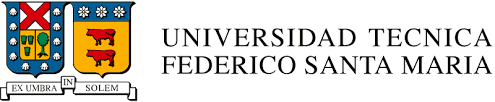</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC



# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ismaelcruzp","key":"c315779ba64184c6ea1d18576a599fcf"}'}

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [4]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 83.6MB/s]


Descomprimir

In [5]:
!unzip seoul-bike-sharing-demand-prediction.zip

Archive:  seoul-bike-sharing-demand-prediction.zip
  inflating: SeoulBikeData.csv       


### 1.1.1 Exploración del conjunto de datos




In [72]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [73]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

**Respuesta** \\
Numéricos: Date, Rented Bike Count, Hour, Temperature, Humidity, Wind Speed, Visibility, Dew Point Temperature, Solar Radiation, Rainfall, Snowfall.

Categóricos: Seasons, Holiday, Functioning Day

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

**Respuesta** De que la fecha esta directamente relacionada con la estación

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

**Respuesta** En la información sobre los datos se indica que no hay ningún valor no nulo

In [74]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

> **Respuesta**: Desgraciadamente, los histogramas de una sola variable ('Holiday', 'Seasons', 'Rented Bike Count') solamente nos muestran la cantidad de veces que sus valores aparecen repetidos en el dataset. Si quisieramos responder las preguntas que se vienen a continuacion, seria necesario hacer grafos que comparen 2 variables, tales como los que se van a hacer a continuacion.
A base de esos grafos se van a reponder las preguntas a continuacion.

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> **Respuesta**: La gente arrienda mas bicicletas durante los dias de trabajo que durante las vacaciones.

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> **Respuesta**: Los días sábados se arriendan un poco más que los martes y jueves, pero menos que el lunes, miércoles y viernes, siendo los domingos los dias que menos bicicletas se arriendan. Si se considera la cantidad promedio de bicicletas arrendadas un día que es fin de semana versus un día de semana, es en este último caso donde más se arriendan bicicletas.

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

> **Respuesta**: El comportamiento es relativamente anomalo en ciertos casos, como podemos ver que a medida de aumenta la condicion climatica como la velocidad del viento, la cantidad de lluvia o hasta la cantidad de nieve, la cantidad de bicicletas arrendadas disminuyen y luego aumentan drasticamente, nuevamente decreciendo despues.

Pero por lo general, podemos concluir que a medida que las condiciones climaticas empeoran, se vera uns disminucion de arriendo de bicicletas en general.

Para las preguntas b), c) y d) apóyese de los gráficos.




Aqui se pueden ver los histogramas para los campos "Holiday", "Seasons" y "Rented Bike Count".

Como se menciono previamente, no hay mucha informacion representativa que se puede obtener de estos ya que solamente presentan la frequencia de ocurrencia de los datos en el dataset.

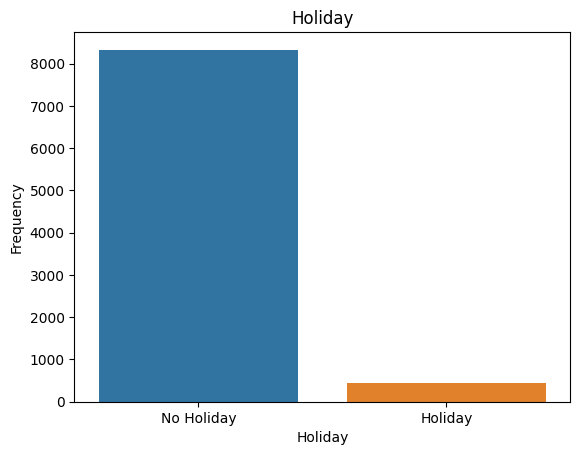

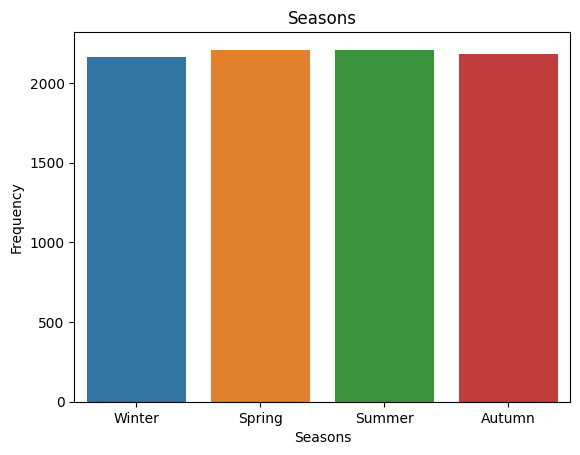

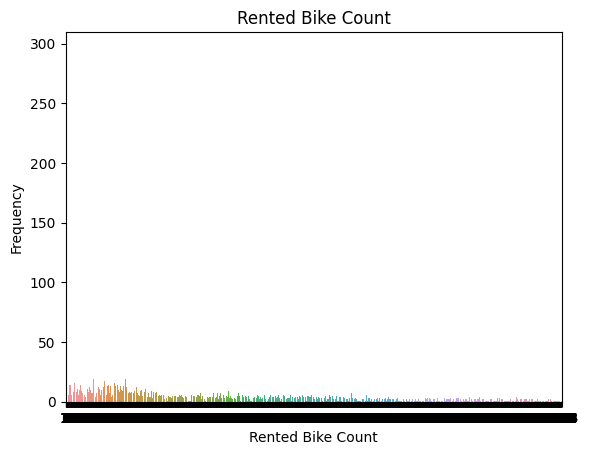

In [139]:
cat_features = data[['Holiday', 'Seasons', 'Rented Bike Count']]
for i in cat_features:
    ax = sns.countplot(x=data[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    

    plt.show()

A continuacion estan los grafos que muestran el comportamiento de bicicletas arrendadas vs distintas condiciones climaticas.

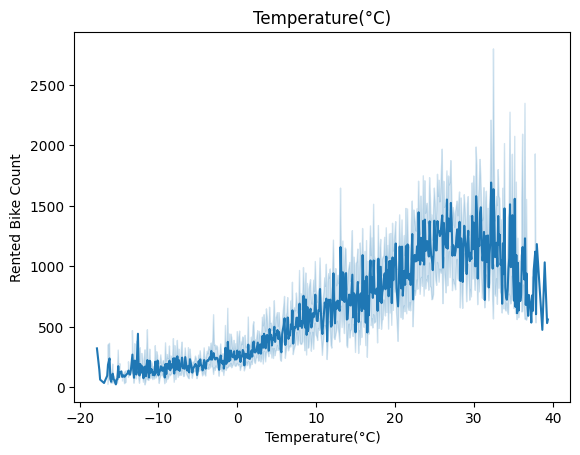

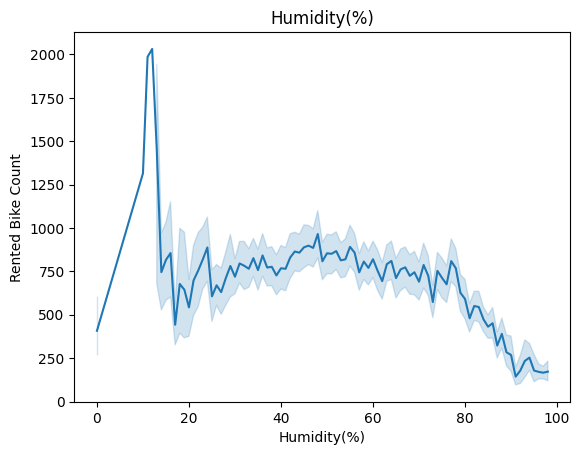

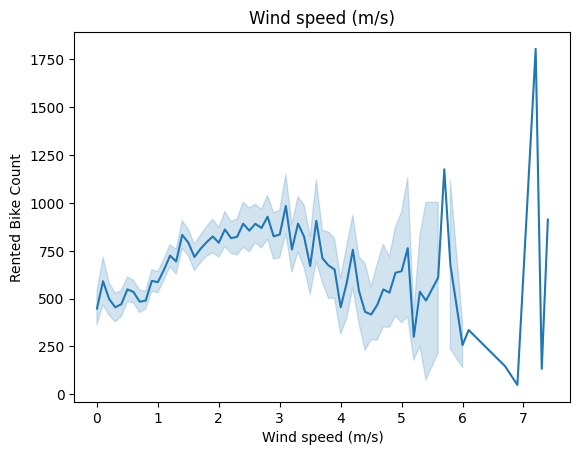

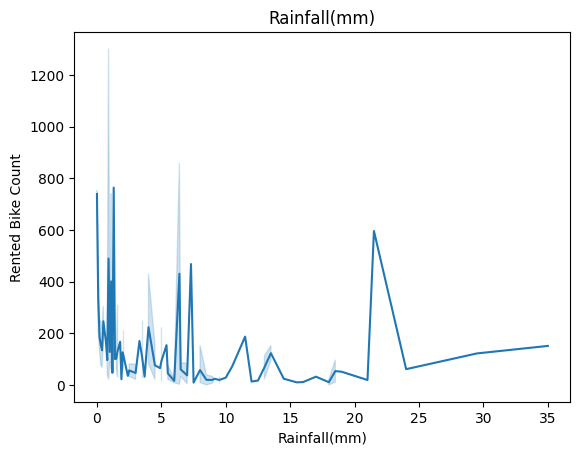

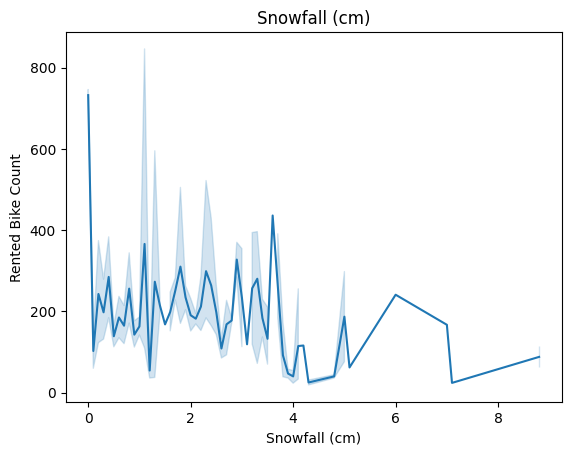

In [76]:
cat_features = data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)']]
for i in cat_features:
    ax = sns.lineplot(x=data[i], y=data['Rented Bike Count'])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Rented Bike Count')
    plt.show()

A continuacion se muestran los graficos de los promedios de bicicletas arrendadas en vacaciones y por dia.

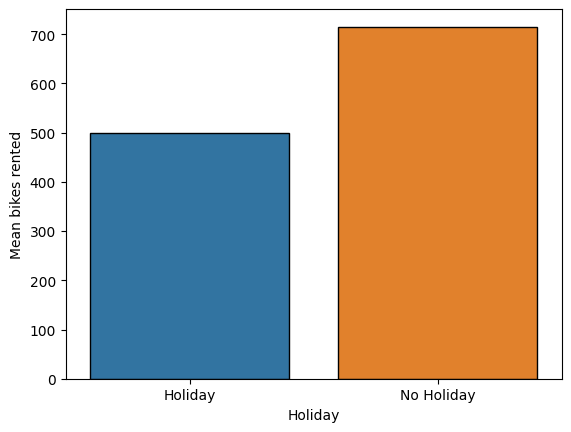

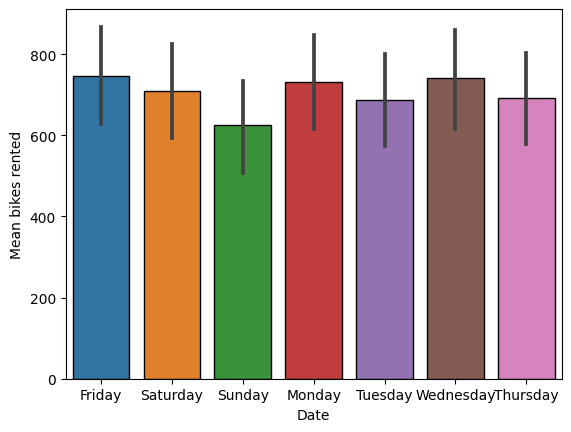

In [77]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
cat_features = data[['Holiday', 'Date']]
for i in cat_features:
    ax = data.groupby(i)['Rented Bike Count'].mean()
    if(i == 'Date'):
        xaxis = ax.index.day_name()
    else:
        xaxis = ax.index
    sns.barplot(x = xaxis, y = ax.values, edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Mean bikes rented')
    plt.show()

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

> **Respuesta**: Las estaciones donde mas se arriendan bicicletas son Verano y Otoño. Por contraste, la estacion durante la cual se arriendan la menor cantidad de bicicletas es durante el Invierno.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [78]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)


> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

<ipython-input-79-6ca3553f9889>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr= data.corr()


<Axes: >

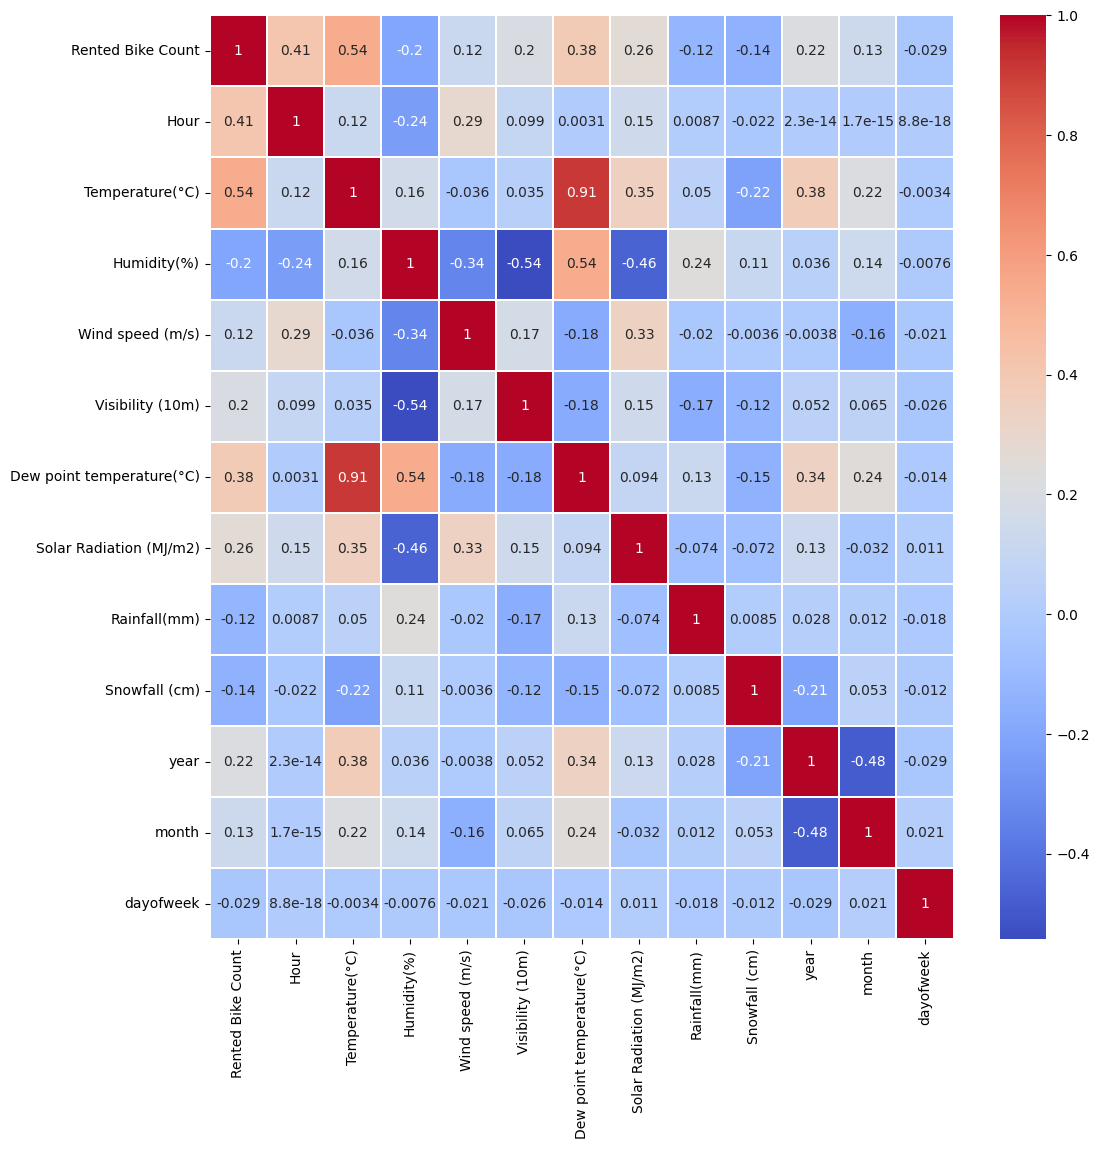

In [79]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

> **Respuesta**:
Una matriz de correlaciones es una tabla que muestra los coeficientes de correlación de distintas variables. De esta manera podemos analizar la relación entre las distintas variables del conjunto de datos. 

> Uno de los correlaciones mayores es la correlacion entre "Temperature" y "Rented Bike Count", con 0.54. Este signífica que si la temperatura es alta, más gente va a alquier una bicicleta. 

>"Visibility" y "humidity" tienen la mayor correlación negativa. Entonces, si hay mucha humedad, la visibilidad será mala, y visaversa. 

>Los variables que tienen la menor correlación son las variables sobre el tiempo. Por ejemplo "hour" y "dayofweek" tiene el valor ≈ 0. Entonces, la hora no depende del día de la semana que sea. 

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [80]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=None)

> b) ¿Para qué es el parámetro stratify?

> **Respuesta**: Es para que tanto el training set como el testing set tengan la misma proporción de la variable objetivo que se quiere predecir. Por ejemplo, si se quiere predecir Y, teniendo esta el valor 0 en un 20% de los datapoints y el valor 1 en un 80%, tanto el test set como el training set tendran un 20% de datapoints con Y = 0.
De no aplicarse, podria darse el caso, por ejemplo al usar un test_size = 0.1, que todos los datos usados para testear tengan el valor Y = 1.

> c) Aplique Label Encoding a las variables _Seasons_, _Functioning Day_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

> **Resuesta**: Label Encoding funciona convirtiendo variables categoricas en numericas, lo cual nos es util para poder utilizarla para entrenar un modelo de aprendizaje automacio que solo utiliza data numerica.

In [82]:
le = preprocessing.LabelEncoder()
X_train["Seasons"] = le.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = le.fit_transform(X_train["Functioning Day"])

> d) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [83]:
X_test["Seasons"] = le.fit_transform(X_test["Seasons"])
X_test["Holiday"] = le.fit_transform(X_test["Holiday"])
X_test["Functioning Day"] = le.fit_transform(X_test["Functioning Day"])

> e) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

> **Respuesta**: La razon por la que label encoding no es utilizado sobre el conjunto de datos es dado a que esto le asigna valores numericos a data no numerica, pero el problema que puede causar esto es que los algoritmos pueden interpretar estos valores como un tipo de jerarquia o que siguen un cierto orden, lo que puede afectar el entrenamiento de un modelo.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [84]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [85]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

186753.364695569

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

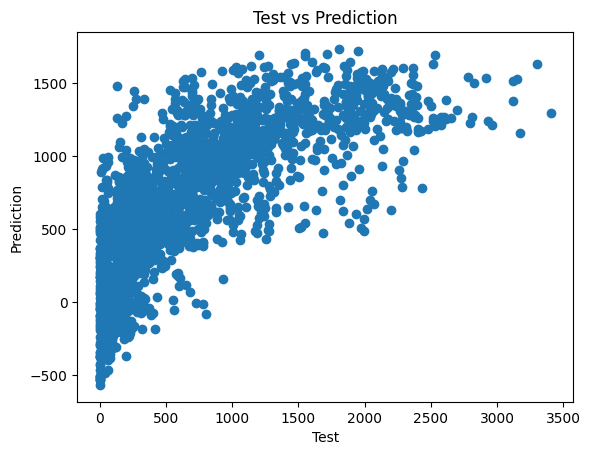

In [86]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

**Respuesta** Si solamente usas el seno o el coseno puede llevar a una pérdida de información en la fase o amplitud de la oscilació. 

In [87]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [88]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [89]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4)
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [90]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [91]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [92]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)


> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [93]:
mean_squared_error(y_test, y_pred)

180267.7989814821

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

> Si, como se puede ver, el error cuadratico medio del modelo pre-procesado es menor que el del modelo de entrenamiento en bruto. Es importante notar que se pueden dar casos en que esto no se cumpla.

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

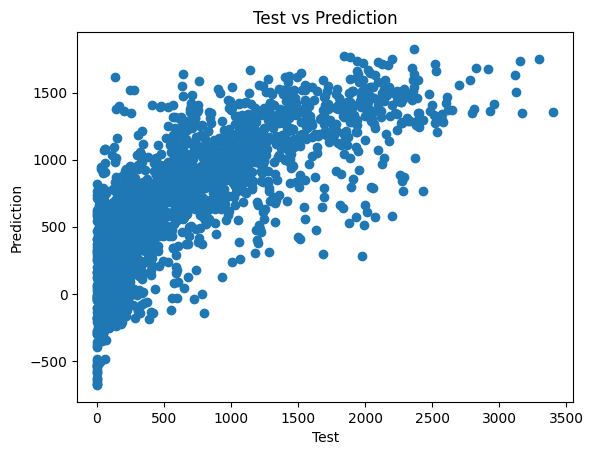

In [94]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [95]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

**Respuesta**:
> Loss: Define el tipo de funcion de perdida a utilizar 

> Penalty: Define el tipo de penalizacion a utilizar en la regresion.

> Tol: Este parametro define el criterio de parada, si se deja como "None", el entrenamiento del modelo se detendra cuando (loss > best_toll - tol) para una cantidad definida de epochs.

> Shuffle: Define si la data de entrenamiendo se deberia barajar despues de cada epoch.

> Warm_start: Warm start nos permite utilizar el resultado obtenido en una iteracion anterior como parametro de partida para el entrenamiento de un nuevo modelo.

> Average: Este parametro se puede dejar como True o como una variable tipo int, en caso de que sea True, se computa el promedio de los pesos del SGD y los almacena en un atributo llamado "coef_", en el caso de asignarle un valor numerico "x", va a partir haciendo este promedio luego de ver "x" muestras. Su valor default es "False"

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

> **Respuesta**: El parámetro alpha en SGD es un hiperparámetro que controla la fuerza de regularización, donde el parámetro alfa determina el peso de penalización. 

> Constant: El alfa es constante durante todo el proceso de entrenamiento.

>Optimal: Ajusta el parámetro alfa durante el proceso de entrenamiento para alcanzar un valor óptimo utilizando una tasa de aprendizaje adaptativa.

>Invscaling: El alfa se reduce en cada iteración.

>Adaptive: Comienza con un valor alfa alto y lo reduce gradualmente.

In [96]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   average=True)


Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

> **Respuesta**: Sirve para detener el entrenamiento del modelo cuando la evaluacion de la validacion es menor que la variable "tol"

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

> **Respuesta**: Lo que se puede interpretar de el resultado es que el modelo presenta underfitting

> f) ¿Cuántas _epochs_ duró su entrenamiento?

> **Respuesta**: El entrenamiento logro durar las 100 epochs que se definieron

In [97]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

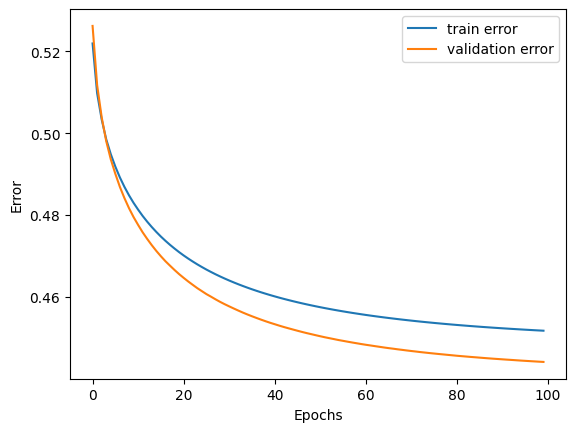

In [98]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [99]:
y_pred = reg.predict(X_test)
y_pred = y_pred.reshape(-1,1) # Si no hacemos esto, la siguiente funcion nos da problemas dadas las dimensiones de y_pred
y_pred = y_scaler.inverse_transform(y_pred)

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [100]:
mean_squared_error(y_test, y_pred)

181398.0795819999

> i) ¿Mejoran los resultados con respecto al modelo anterior?

**Respuesta**: El modelo presenta tener mejores resultados que el modelo entrenado en breuto, pero su rendimiento es levemente peor que el modelo entrenado con data pre-procesada.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

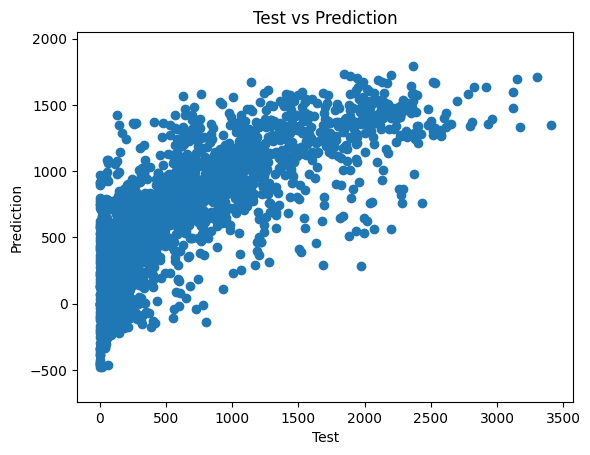

In [101]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

> **Respuesta**: Los _hiperparametros_ son parametros que se deciden una persona previo a la puesta en marcha del entrenamiento del modelo. A diferencia de los parametros del modelo, estos no se obtienen durante el entrenamiento del modelo.
La manera que estos hiperparametros se relacionan al concepto de _hyper tuning_ es que este ultimo consiste en la busqueda de los mejores hiperparametros para el modelo.

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

> **Respuesta**: Penalizar el modelo nos ayuda a evitar problemas como overfitting.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

> **Respuesta**: En la regularizacion Ridge, la penalizacion esta compuesta de la suma de los pesos del modelo al cuadrado, todo esto multiplicado por un parametro lambda que es el parametro de regularizacion.

> d) ¿Cómo funciona la regularización Lasso?

> **Respuesta**: La regularizacion Lazzo funciona como una manera de hacer reduccion de features con el objetivo de evitar _overfitting_ y mejorar el rendimiento del modelo. Esto lo hace seleccionando las mejores features para el modelo y ignorando las restantes.

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

**Respuesta**: 

> Ventajas: 
* La Ridge es más rapido de la Lasso. 
* Cuándo hay muchas variables, Ridge tiene mejor rendimiento. 
* No elimina completamente los coeficientes de las variables, lo que puede ser deseable en algunos casos en los que todas las variables son relevantes para la predicción.

> Desventajas:
* Si todas las variables son relevantes, Ridge no mejorará la precisión predictiva del modelo. 

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [102]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [103]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [104]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [105]:
hypereg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [106]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012428,0.002331,0.003733,0.002178,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.844096e+23,-2.561847e+23,-3.222980e+23,-4.433021e+22,-3.294503e+22,-1.880335e+23,1.238249e+23,49
1,0.015409,0.002359,0.003559,0.001574,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.215027e+24,-8.380174e+22,-3.113335e+23,-2.650148e+23,-2.796035e+23,-6.309561e+23,7.960124e+23,53
2,0.041718,0.007392,0.002750,0.000031,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-7.588959e+21,-1.254958e+11,-5.575596e+18,-4.119574e+00,-6.015807e+21,-2.722068e+21,3.368501e+21,47
3,0.088650,0.020609,0.002882,0.000253,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.501171e+19,-6.473128e+17,-1.227156e+21,-5.919801e-01,-2.895971e+16,-2.565688e+20,4.857572e+20,45
4,0.016998,0.002488,0.002657,0.000338,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.714400e-01,-4.286923e-01,-5.135364e-01,-5.035067e-01,-4.198778e-01,-4.674106e-01,3.796111e-02,12
5,0.032584,0.009913,0.002883,0.000414,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.513451e-01,-5.588678e-01,-5.146533e-01,-4.822172e-01,-4.132268e-01,-4.840620e-01,5.024570e-02,18
6,0.015308,0.004300,0.002475,0.000142,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-7.480216e-01,-4.443071e-01,-5.515387e-01,-5.050568e-01,-5.062487e-01,-5.510346e-01,1.042254e-01,29
7,0.018920,0.003673,0.002539,0.000073,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.000285e-01,-5.157309e-01,-5.529591e-01,-4.883873e-01,-4.568814e-01,-5.027974e-01,3.164511e-02,22
8,0.049228,0.013323,0.002906,0.000208,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.058955e+18,-2.840355e+19,-1.383896e+18,-5.562089e-01,-1.132066e+02,-6.769281e+18,1.091821e+19,41
9,0.072519,0.012234,0.002759,0.000033,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-1.319186e+19,-2.299787e+17,-4.569387e+19,-9.463474e+16,-9.944822e+19,-3.173171e+19,3.772918e+19,44


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [107]:
y_pred = hypereg.predict(X_test)
y_pred = y_pred.reshape(-1,1)
y_pred = y_scaler.inverse_transform(y_pred)



> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [108]:
mean_squared_error(y_test, y_pred)

183312.19638038595

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

> **Respuesta**: Podemos ver que el modelo tiende a obtener resultados mejores que los obtenidos con el modelo entrenado en bruto, relativamente cercanos a los obtenidos con el modelo SGD, y peores que los obtenidos con el modelo preprocesado.

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

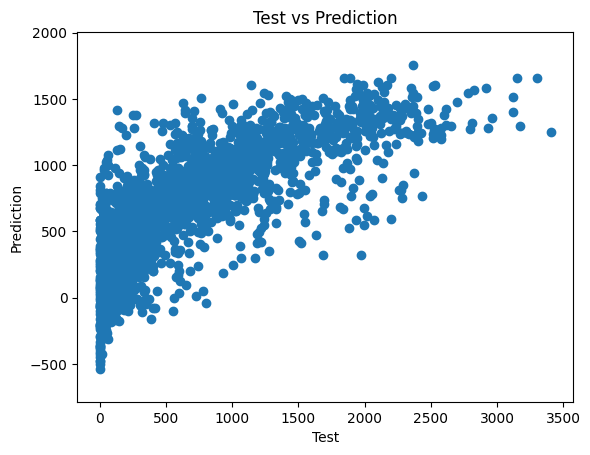

In [109]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

Trabajando con distintos modelos de aprendizaje para este dataset, analizando el "mean_square_error" como nuestro parametro para evaluar su rendimiento se encontro que el tipo de modelo de regresion lineal que presentaba el mejor rendimiento fue el modelo con datos pre-procesados.

Al optimizar el modelo con regularizacion, se encontro con gridsearchCV que los parametros que mejoraban el rendimiento del modelo fueron los siguientes:

Penalizacion: L1

Aprendizaje: constante

eth0 = 0.001

alpha = 0.0001

Aun asi, viendo los resultados obtenidos por los distintos modelos:

Bruto: 186753.36

Pre-Procesado: 180267.79

SGD: 181398.07

Modelo con Regularizacion: 183312.19

Podemos volver a ver que el modelo de regresion lineal con pre-procesamiento de los datos tiene el mejor rendimiento, superior al modelo con regularizacion, pero esto ultimo tambien se podria haber inferido dado el grafico de training error vs validation error que vimos anteriormente, ya que como el modelo parece tener underfitting, regularizarlo no nos mejoraria el rendimiento.


# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [110]:
!kaggle datasets download -d uciml/mushroom-classification

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [111]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
replace mushrooms.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [112]:
df = pd.read_csv('/content/mushrooms.csv')

In [113]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [114]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

**Respuesta** 
> Porque todas las filas de este dataset poseen el mismo valor para esta variable (p), por lo que no es algo que distinga a los datos.

<Axes: xlabel='veil-type', ylabel='count'>

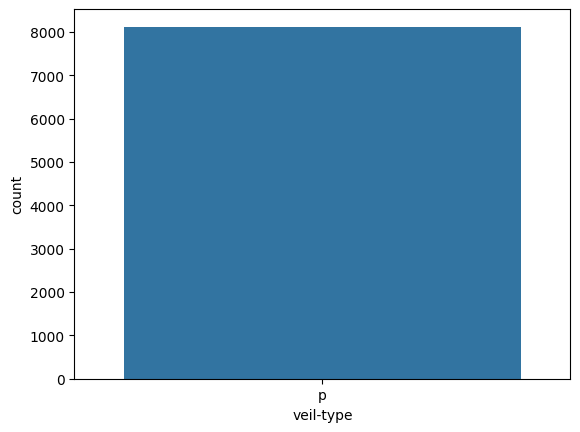

In [115]:
sns.countplot(x="veil-type", data=df)

In [116]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


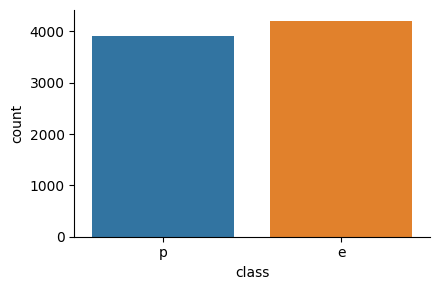

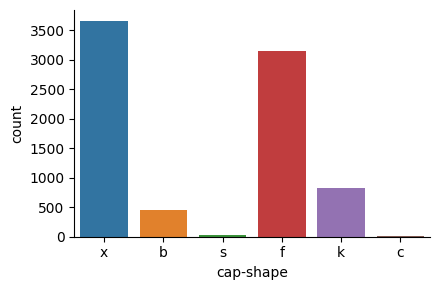

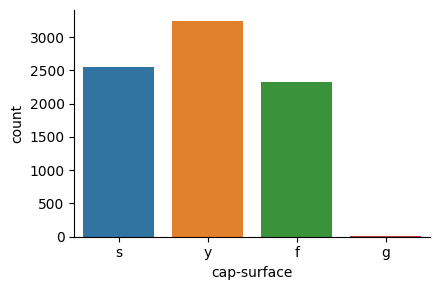

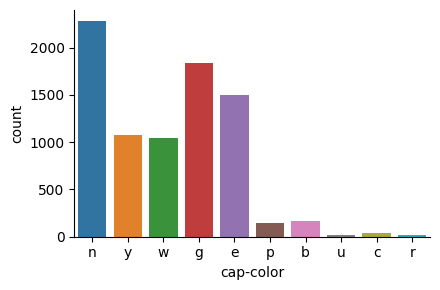

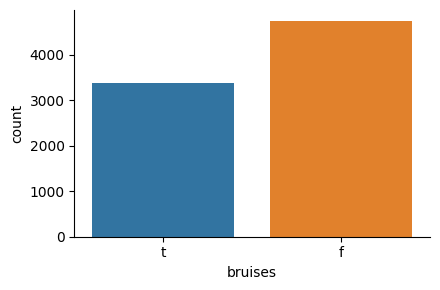

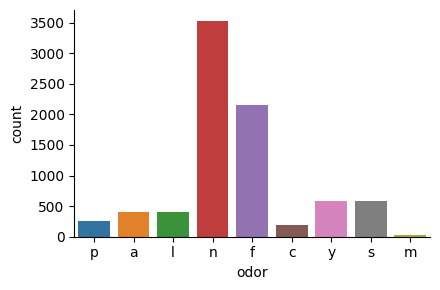

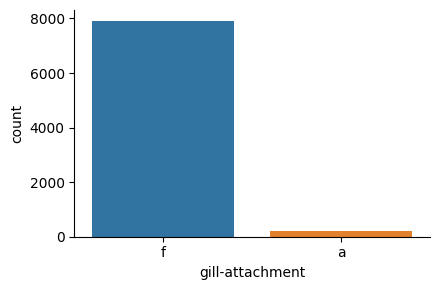

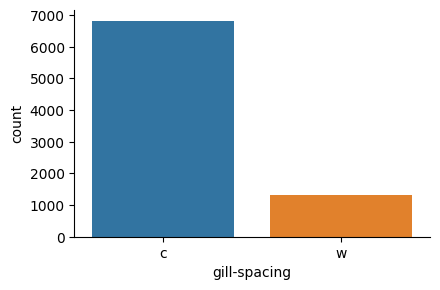

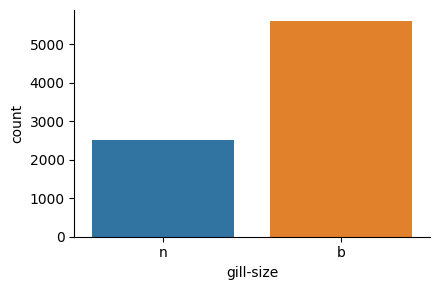

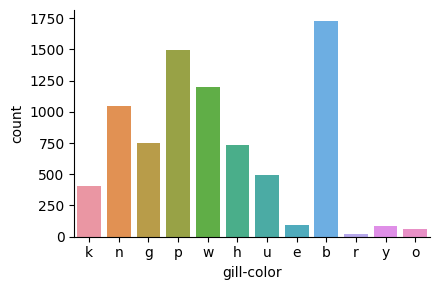

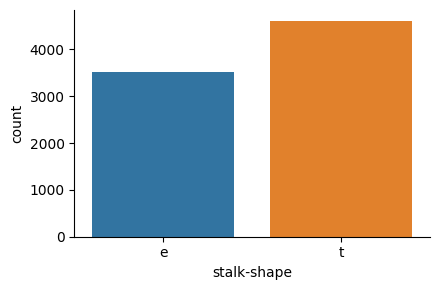

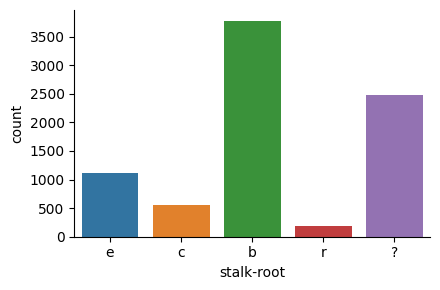

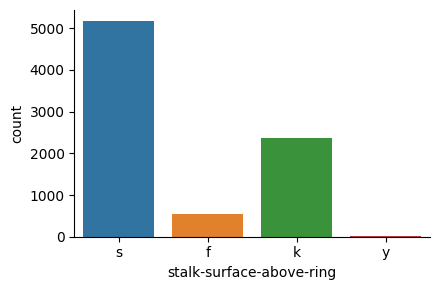

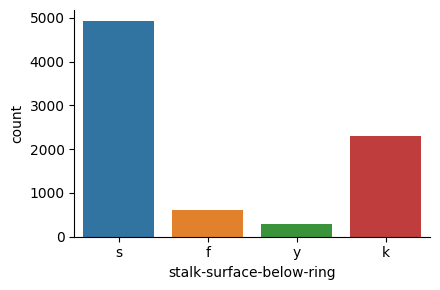

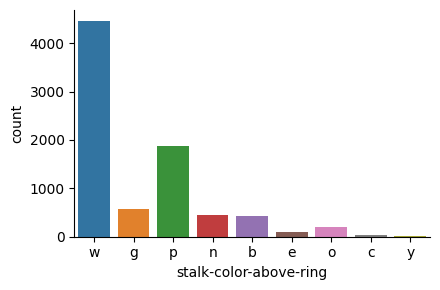

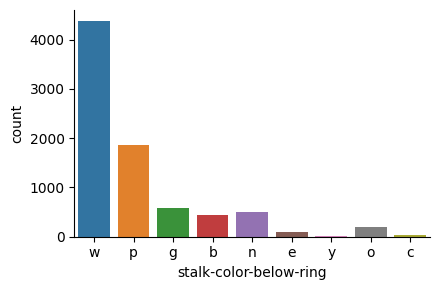

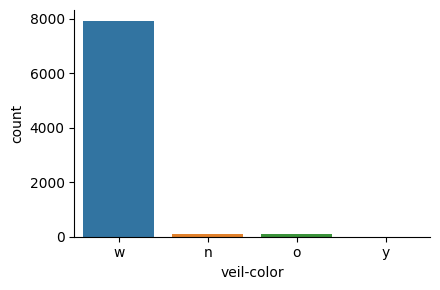

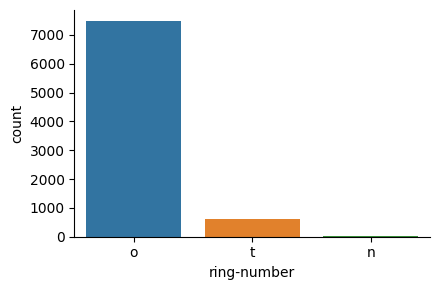

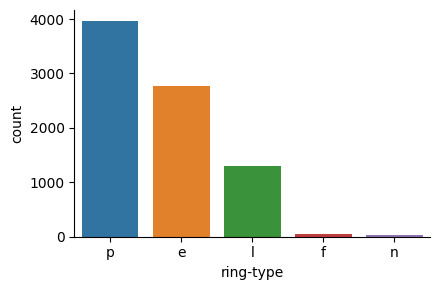

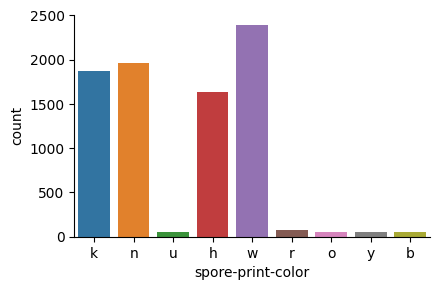

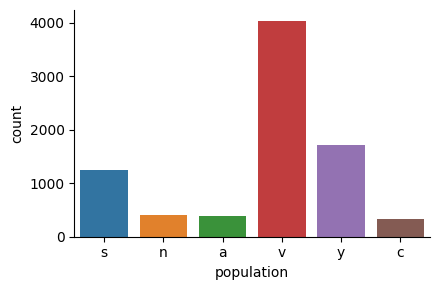

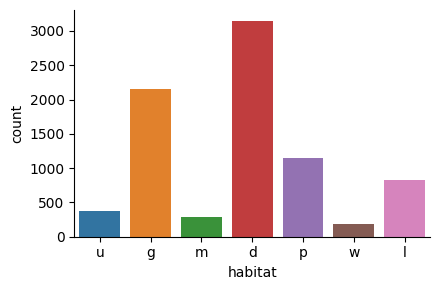

In [117]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [118]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

In [119]:
# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


> e) Separe los subconjuntos en _X_ e _y_

In [120]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [121]:
pca = PCA(n_components=X_train.shape[1] - 1)
pca.fit(X_train)
X_train_pca_1 = pca.transform(X_train)
X_test_pca_1 = pca.transform(X_test)

pca = PCA(n_components=X_train.shape[1] - 10)
pca.fit(X_train)
X_train_pca_10 = pca.transform(X_train)
X_test_pca_10 = pca.transform(X_test)

pca = PCA(n_components=X_train.shape[1] - 50)
pca.fit(X_train)
X_train_pca_50 = pca.transform(X_train)
X_test_pca_50 = pca.transform(X_test)


In [122]:
X_pca_list = list()
X_pca_list.append(["PCA with 1 less component", X_train_pca_1, X_test_pca_1])
X_pca_list.append(["PCA with 10 less components", X_train_pca_10, X_test_pca_10])
X_pca_list.append(["PCA with 50 less components", X_train_pca_50, X_test_pca_50])

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [123]:
mi =mutual_info_classif(X_train, y_train)

In [124]:
# get the indices of the features sorted by mutual information score
sorted_indices = np.argsort(mi)

# compute the number of features to select
n = len(mi) - 1

# select the top n features
selected_indices = sorted_indices[-n:]

selected_indices = np.sort(selected_indices)
X_train_mi_1 = X_train.copy().iloc[:,selected_indices]
X_test_mi_1 = X_test.copy().iloc[:,selected_indices]

n = len(mi) - 10

selected_indices = sorted_indices[-n:]

selected_indices = np.sort(selected_indices)
X_train_mi_10 = X_train.copy().iloc[:,selected_indices]
X_test_mi_10 = X_test.copy().iloc[:,selected_indices]

n = len(mi) - 50

# select the top n features
selected_indices = sorted_indices[-n:]

selected_indices = np.sort(selected_indices)
X_train_mi_50 = X_train.copy().iloc[:,selected_indices]
X_test_mi_50 = X_test.copy().iloc[:,selected_indices]

In [125]:
X_mi_list = list()
X_mi_list.append(["MI with 1 less component", X_train_mi_1, X_test_mi_1])
X_mi_list.append(["MI with 10 less components", X_train_mi_10, X_test_mi_10])
X_mi_list.append(["MI with 50 less components", X_train_mi_50, X_test_mi_50])

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

**Respuesta**
> Distribución de Bernoulli y distribución multinomial

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [126]:
clf = GaussianNB()
gaussian_preds_list = list()

# para datos en bruto
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
gaussian_preds_list.append([y_pred,"None"])

# para PCA
for i in X_pca_list:
  clf.fit(i[1], y_train)

  y_pred_pca = clf.predict(i[2])
  gaussian_preds_list.append([y_pred_pca,i[0]])

# para mutual information
for i in X_mi_list:
  clf.fit(i[1], y_train)

  y_pred_mi = clf.predict(i[2])
  gaussian_preds_list.append([y_pred_mi,i[0]])


> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [127]:
res_list = list()
for i in gaussian_preds_list:
  report_dictionary = classification_report(y_test, i[0], labels=[0, 1],target_names=['Edible', 'Poisonous'], output_dict = True)
  res_list.append([report_dictionary["accuracy"], i[1]])
  print(i[1])
  print(classification_report(y_test, i[0], labels=[0, 1],target_names=['Edible', 'Poisonous']))

None
              precision    recall  f1-score   support

      Edible       1.00      0.97      0.99      1303
   Poisonous       0.97      1.00      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.99      0.98      2437
weighted avg       0.98      0.98      0.98      2437

PCA with 1 less component
              precision    recall  f1-score   support

      Edible       1.00      0.03      0.06      1303
   Poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA with 10 less components
              precision    recall  f1-score   support

      Edible       1.00      0.03      0.06      1303
   Poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg   

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.



In [128]:
for i in sorted(res_list):
  print(str(i[1]) + " accuracy: " + str(i[0]))

PCA with 1 less component accuracy: 0.48132950348789494
PCA with 10 less components accuracy: 0.48132950348789494
PCA with 50 less components accuracy: 0.9199835863766926
MI with 50 less components accuracy: 0.9454247025030775
MI with 10 less components accuracy: 0.9524004924086992
MI with 1 less component accuracy: 0.9839967172753386
None accuracy: 0.9844070578580222


> **Respuesta**: Considerando el accuracy obtenido de cada combinación de n componentes eliminados, y la técnica usada para reducir features, se puede ver que el set con 10 features menos gracias a Mutual Information es la mejor opción.

> f) Muestre los errores tipo 1 y tipo 2.

> **Respuesta**: Considerando que un hongo comestible corresponde a un resultado positivo y uno venenoso a uno negativo, el cuadro superior izquierdo de la matriz de confusión a continuación corresponde al tipo 1, mientras que el superior derecho corresponde al error de tipo 2. (Esto también aplica para las matrices de confusión mostradas a continuación)

<Axes: >

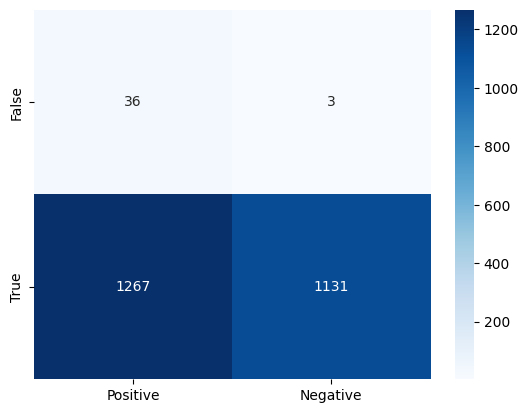

In [129]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, gaussian_preds_list[4][0])  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['False', 'True'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

**Respuesta**: LDA asume que la distribución condicional de cada clase, dadas las características de entrada, sigue una distribución gaussiana con una matriz de covarianza compartida en todas las clases.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

**Respuesta**: LDA asume que las matrices de covarianza de la distribución condicional para cada clase son iguales

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [130]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_mi_1, y_train)

y_pred = clf.predict(X_test_mi_1)


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [131]:
print(classification_report(y_test, y_pred, labels=[0, 1] ,target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1303
   Poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



> e) Muestre los errores tipo 1 y tipo 2.

<Axes: >

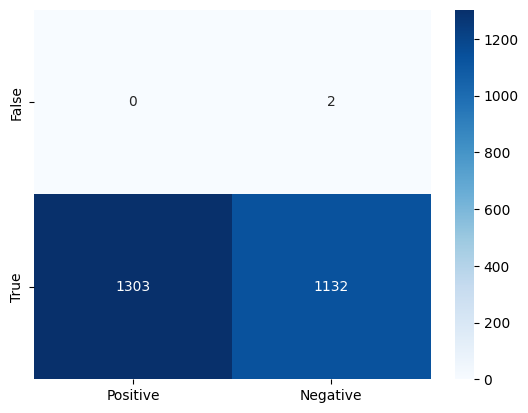

In [132]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['False', 'True'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

**Respuesta**: Estimación de máxima encuentra los valores de los coeficientes que hacen que los datos observados sean los más probables bajo el modelo supuesto. 

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

**Respuesta**: Este modelo asume que la relación es lineal

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

**Respuesta**: La metodo más comun es usar regularización, que añade un término de penalización a la función objetivo del modelo de regresión logística, que desincentiva los valores de coeficiente grandes.

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [133]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_mi_1, y_train)

y_pred = clf.predict(X_test_mi_1)


> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [134]:
print(classification_report(y_test, y_pred, labels=[0, 1],target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.98      0.99      0.99      1303
   Poisonous       0.99      0.98      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.99      0.98      0.98      2437
weighted avg       0.98      0.98      0.98      2437



> f) Muestre los errores tipo 1 y tipo 2.

<Axes: >

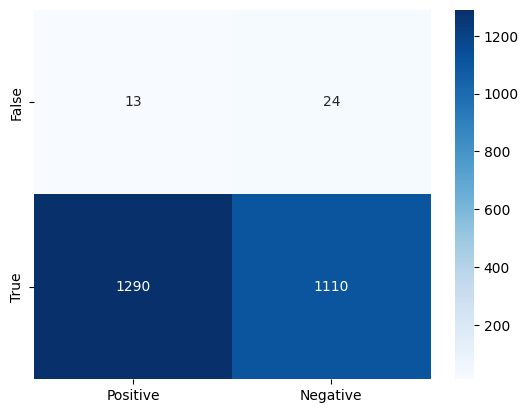

In [135]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['False', 'True'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [136]:
kernels = {'linear', 'poly', 'rbf'}
gammas = {'scale', 'auto'}
preds = []

for i in kernels:
  for j in gammas:
    clf = NuSVC(kernel=i, gamma=j)
    clf.fit(X_train_mi_1, y_train)

    y_pred = clf.predict(X_test_mi_1)
    preds.append([y_pred,i,j])


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [137]:
for i in preds:
  print("Kernel: " + i[1] + " / " + "Gamma: "  + i[2])
  print(classification_report(y_test, i[0], labels=[0, 1], target_names=['Edible', 'Poisonous']))

Kernel: poly / Gamma: scale
              precision    recall  f1-score   support

      Edible       0.87      1.00      0.93      1303
   Poisonous       1.00      0.84      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437

Kernel: poly / Gamma: auto
              precision    recall  f1-score   support

      Edible       0.87      1.00      0.93      1303
   Poisonous       1.00      0.84      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437

Kernel: linear / Gamma: scale
              precision    recall  f1-score   support

      Edible       0.86      1.00      0.92      1303
   Poisonous       1.00      0.81      0.90      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.91      0.91

> e) Muestre los errores tipo 1 y tipo 2.

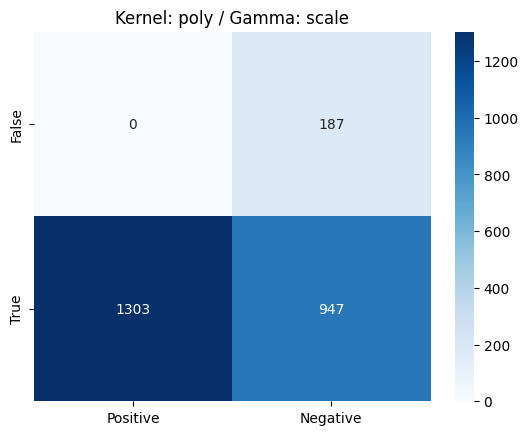

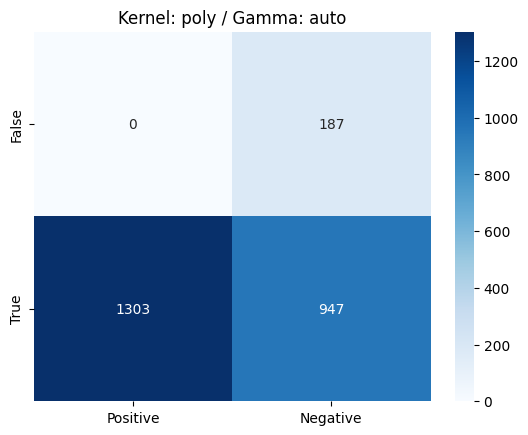

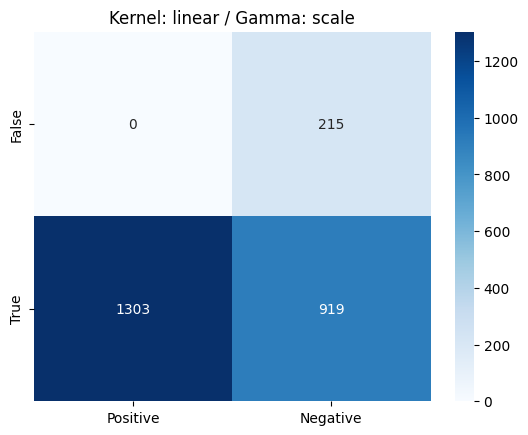

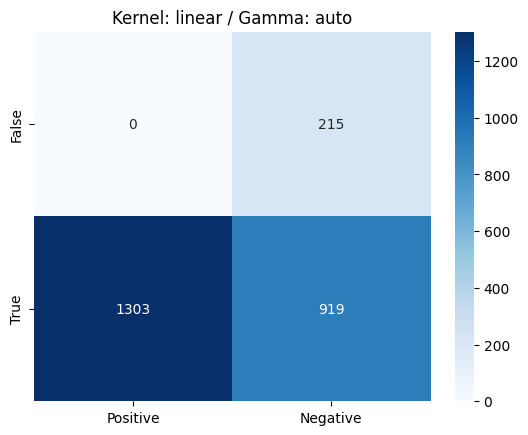

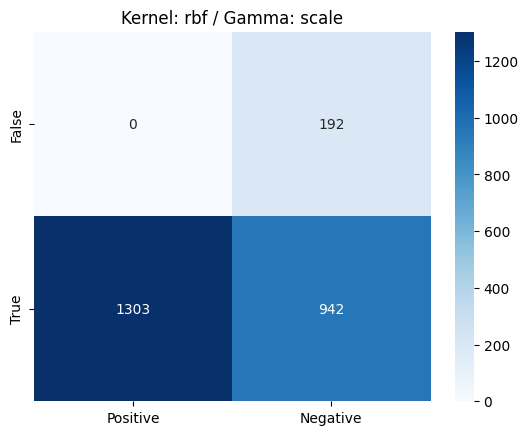

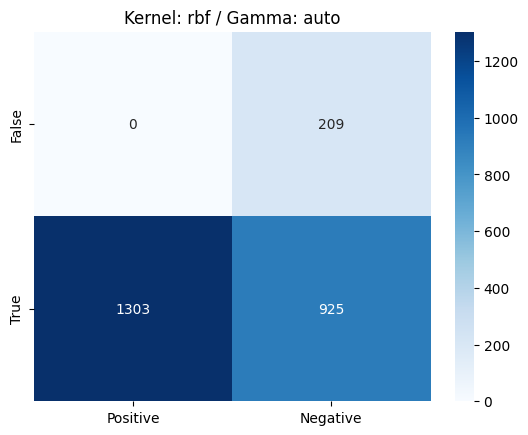

In [138]:
for i in preds:
  plt.figure()
  plt.title("Kernel: " + i[1] + " / " + "Gamma: "  + i[2])
  # assume you have a classification report saved in the variable `report`
  cm = confusion_matrix(y_test, i[0])  # replace y_true and y_pred with your actual true and predicted labels

  # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
  tn, fp, fn, tp = cm.ravel()

  # create a 2x2 matrix of the type 1 and type 2 errors
  error_matrix = [[fp, fn], [tn, tp]]

  # plot the heatmap using seaborn
  sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['False', 'True'])


## 2.3 Conclusiones:

En cuanto a los resultados obtenidos en la sección 2.1, se puede apreciar como el método usado para reducir features junta a la cantidad de features reducidas afecta considerablemente la calidad del modelo, dandose el caso de que al usar Principal Component Analysis para reducir la cantidad de features en 1 y 10, se obtiene un accuracy menor al 50% al usando el modelo Naive Bayes, lo que es un horrible resultado considerando que el target tiene un valor binario. Sin embargo, al usuar Mutual Information, se obtiene como mínimo un accuracy de 0.88, usando los valores para k solicitados.

Cabe mencionar que esto se da cuando se usa el valor random_state = 42 al dividir el dataset entre train set y test set, y que otras seeds varían en las posiciones en el ranking y valores de accuracy (Siendo PCA cpn 1 y 10 menos componentes los modelos más precisos cuando random_state = 1), por lo que la información mencionada anteriormente no es una demostración de que una técnica es superior que otra, o que hay un valor ideal de features a eliminar.

Se pudo también ver como distintos modelos obtienen distintos resultados, siendo el más preciso para este caso LDA, el cual solo tuvo dos errores (De tipo 2).

En cuanto a las SVM, lo más resaltable es la similaridad de los resultados entre los kernels, y como el cambiar el gamma de auto (Que tiene el valor 1/n_features) a scale (Que tiene un valor (1/(n_features * X.var())) solo mostro cambios en los resultados al usar el kernel kbf.
